In [1]:
import os 
from matplotlib import pyplot as plt
from natsort import natsorted

In [4]:
ROOT_DIR = "../../output/20240811_v6_ckpt_from_new_code_repeat0/val_unslpash-trainset/1.0/no_consistnacy"

plot_id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28] losses:  [0.12045280976841848, 0.12048311821288532, 0.12051767274323437, 0.12057636217214167, 0.12067683276513384, 0.12078544877262579, 0.12090445637909902, 0.12104136697016657, 0.12123690780459179, 0.12137878214836949, 0.12159174730897777, 0.12176544609117425, 0.1220374679658562, 0.12234515008102688, 0.12247592124363614, 0.12279192870224101, 0.12307554432967056, 0.12336421152576804, 0.12346583630941395, 0.12364208093430433, 0.12377295428369608, 0.12393336248480612, 0.12419154472235176, 0.12438108931399054, 0.12462927582673729, 0.12478399704624381, 0.12491442341253989, 0.1251813354022387]
min_loss_id:  0
min_loss:  0.12045280976841848
min_plot_id:  1


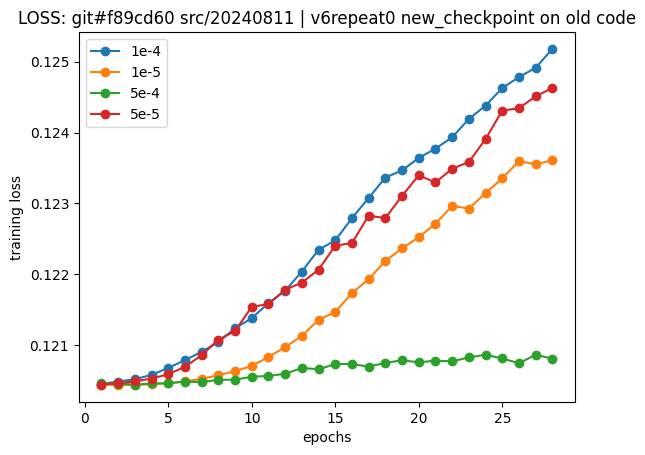

In [6]:
LRs = natsorted(os.listdir(ROOT_DIR))  
for lr in LRs:
    checkpoints = natsorted(os.listdir(os.path.join(ROOT_DIR, lr)))
    checkpoints = ["chk{}".format(i) for i in range(1,29)]
    checkpoint_id = []
    avg_losses = []
    for checkpoint in checkpoints:
        # read all text files in directory and average to single float
        all_losses = []
        step_root_dir = os.path.join(ROOT_DIR, lr, checkpoint, 'lightning_logs/version_0/train_loss')
        step_dirs = natsorted(os.listdir(step_root_dir))
        for step_id in step_dirs:     
            for file in os.listdir(os.path.join(step_root_dir, step_id)):
                if file.endswith(".txt"):
                    with open(os.path.join(step_root_dir, step_id, file), 'r') as f:
                        all_losses.append(float(f.read()))       
        avg_loss = sum(all_losses) / len(all_losses)
        avg_losses.append(avg_loss)
        checkpoint_id.append(int(checkpoint.replace("chk","")))
    plt.plot(checkpoint_id, avg_losses, 'o-', label=lr)
    if lr == "1e-4":
        print("plot_id: ", checkpoint_id, "losses: ", avg_losses)
        # find the location that has the lowest loss
        min_loss = min(avg_losses)
        min_loss_id = avg_losses.index(min_loss)
        print("min_loss_id: ", min_loss_id)
        print("min_loss: ", min_loss)
        # print min plot_id
        print("min_plot_id: ", checkpoint_id[min_loss_id])
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("training loss")
    #plt.title("Training loss average on timesteps [100,200,...,900]")
    plt.title("LOSS: git#f89cd60 src/20240811 | v6repeat0 new_checkpoint on old code")